# On Prem Whisper Estimate

This notebook contains some rudimentary analysis of the results from running whisper testing using the process outlined in the [README.md](README.md). It specifically looks at how long we might expect running Whisper on premises using hardware similar to the RDF GPU workstation.

## SDR Data

First lets load the metadata for the items that were selected for the analysis. The CSV was obtained from the [Media for Whisper Pilot](https://docs.google.com/spreadsheets/d/1sgcxy0eNwWTn1LeMVH8TDJ6J8qL8iIGfZ25t4nmYqyQ/edit#gid=0) Google Sheet.

In [1]:
import pandas

sdr = pandas.read_csv('../sdr-data.csv')
sdr.head(5)

,Druid,Argo Link,PURL,Title,Notes,Source language,Duration,Speech Begins,Tasks,"Captions / Transcript File? (Type, Lang)",Testing Focus,Redundant? Omit?
0,bb158br2509,https://argo.stanford.edu/view/druid:bb158br2509,https://purl.stanford.edu/bb158br2509,Project South - S611,"Clear spoken audio, persistant hum in the back...",English,1842,0:00:02,"Run through medium and large models, track tim...","Yes (vtt and txt, English)",Preprocessing (remove background noise). Strai...,NaN
1,bg405cn7261,https://argo.stanford.edu/view/druid:bg405cn7261,https://purl.stanford.edu/bg405cn7261,"Whitmire, Amanda L. Student work, copyright an...","Clear spoken audio, uses language and acronyms...",English,655,0:00:24,"Run through medium and large models, track tim...","Yes (vtt and txt, English)","Transcription. Acronyms, subject-specific terms.",NaN
2,bh446wm7842,https://argo.stanford.edu/view/druid:bh446wm7842,https://purl.stanford.edu/bh446wm7842,"Telmet, Kaja, 1950 Oral history interview with...","Clear spoken audio, in Estonian. We have Russi...",Estonian,9642,0:00:03,"Run through medium and large models, obtain Es...","Yes (vtt, English and Russian)",Translation (Estonian to English or Russian). ...,NaN
3,br525sp8033,https://argo.stanford.edu/view/druid:br525sp8033,https://purl.stanford.edu/br525sp8033,"USSR Exhibit 401: ""German Destruction in USSR""...","Clear spoken audio in Russian, some cracks and...",Russian,471,0:00:04,"Run through medium and large models, obtain Ru...","Yes (vtt and txt, English and Russian)","Testing Russian transcription, and/or translat...",NaN
4,bw689yg2740,https://argo.stanford.edu/view/druid:bw689yg2740,https://purl.stanford.edu/bw689yg2740,Stanford University. Native American Cultural ...,Inconsistent audio quality due to mic placemen...,English,5080,0:00:04,"Run through medium and large models, track tim...","Yes (vtt and txt, English)","Transcription, multiple speakers. Diarization ...",NaN


## Whisper Results

Next lets get the Whisper results for one of the test runs that were performed using the [RDS/DLSS GPU Workstation](https://docs.google.com/document/d/1k4fTuLUpT1S7WGtYTLPdE9pI_UwffiOW4-lcJKpIaW0/edit#heading=h.k6w3eccrwgdq).

In [2]:
whisper = pandas.read_csv('../docs/output-2024-04-11/report-whisper.csv')
whisper.head(5)

,run_id,druid,file,language,transcript_language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,deletions,diff,options
0,bb158br2509-whisper-001,bb158br2509,bb158br2509_sl.m4a,en,en,165.593779,0.070419,0.069941,0.090797,0.909203,4242,96,31,192,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
1,bb158br2509-whisper-002,bb158br2509,bb158br2509_sl.m4a,en,en,158.218959,0.070419,0.069941,0.090797,0.909203,4242,96,31,192,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
2,bb158br2509-whisper-003,bb158br2509,bb158br2509_sl.m4a,en,en,143.839573,0.068212,0.067408,0.089311,0.910689,4275,101,54,154,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
3,bb158br2509-whisper-004,bb158br2509,bb158br2509_sl.m4a,en,en,143.844304,0.068212,0.067408,0.089311,0.910689,4275,101,54,154,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
4,bb158br2509-whisper-005,bb158br2509,bb158br2509_sl.m4a,en,en,169.810724,0.067108,0.066652,0.087696,0.912304,4257,97,31,176,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."


## Processing the Backlog with Whisper

Andrew Berger did some analysis of publicly available SDR media content which would benefit from transcription. He found 48,824 hours of content (175,766,400 seconds).

Based on our Whisper results how long would it take to process this content sequentially using equivalent hardware to the GPU Workstation? Note, this hardware only supports one process accessing the Whisper Large model at a time.

The Whisper results include multiple runs with the same file but with different options. Lets take the shortest runtime for each file for a best case estimate.

In [3]:
whisper = whisper.sort_values('runtime', ascending=True).groupby('druid').first()
whisper

,run_id,file,language,transcript_language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,deletions,diff,options
druid,,,,,,,,,,,,,,,
bb158br2509,bb158br2509-whisper-003,bb158br2509_sl.m4a,en,en,143.839573,0.068212,0.067408,0.089311,0.910689,4275,101,54,154,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
bg405cn7261,bg405cn7261-whisper-050,bg405cn7261_v2_sl.mp4,en,en,58.179610,0.024550,0.024233,0.033329,0.966671,1812,17,24,4,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
bw689yg2740,bw689yg2740-whisper-147,bw689yg2740_sl.mp4,en,en,394.146079,0.130504,0.123257,0.160538,0.839462,10499,446,665,365,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
fh290wd1772,fh290wd1772-whisper-196,fh290wd1772_v2_sp_sl.m4a,en,en,10.737208,0.307246,0.305476,0.413412,0.586588,241,44,2,60,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
gj097zq7635,gj097zq7635-whisper-243,gj097zq7635_a_sl.m4a,en,en,248.004047,0.107181,0.104104,0.149901,0.850099,6833,362,219,213,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
gk220dt2833,gk220dt2833-whisper-292,gk220dt2833_Ali_Shan_10of10_sl.mp4,en,en,38.127071,0.081953,0.080617,0.118042,0.881958,1072,45,19,30,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
gn213vd3845,gn213vd3845-whisper-340,gn213vd3845_ev_1_sl.mp4,es,es,30.259215,0.361199,0.305741,0.385449,0.614551,520,59,115,55,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
kp010zv7055,kp010zv7055-whisper-386,kp010zv7055_a_sl.m4a,en,en,43.001352,0.976378,0.976378,0.998787,0.001213,15,277,0,343,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
qf378nj5000,qf378nj5000-whisper-436,qf378nj5000_sl.mp4,en,en,192.431007,0.165619,0.158228,0.197782,0.802218,5187,235,275,465,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."


Now the Duration from the SDR data can be joined in:

In [7]:
whisper = whisper.join(sdr.set_index('Druid'))
whisper.head(5)

,run_id,file,language,transcript_language,runtime,wer,mer,wil,wip,hits,...,PURL,Title,Notes,Source language,Duration,Speech Begins,Tasks,"Captions / Transcript File? (Type, Lang)",Testing Focus,Redundant? Omit?
druid,,,,,,,,,,,,,,,,,,,,,
bb158br2509,bb158br2509-whisper-003,bb158br2509_sl.m4a,en,en,143.839573,0.068212,0.067408,0.089311,0.910689,4275,...,https://purl.stanford.edu/bb158br2509,Project South - S611,"Clear spoken audio, persistant hum in the back...",English,1842,0:00:02,"Run through medium and large models, track tim...","Yes (vtt and txt, English)",Preprocessing (remove background noise). Strai...,NaN
bg405cn7261,bg405cn7261-whisper-050,bg405cn7261_v2_sl.mp4,en,en,58.179610,0.024550,0.024233,0.033329,0.966671,1812,...,https://purl.stanford.edu/bg405cn7261,"Whitmire, Amanda L. Student work, copyright an...","Clear spoken audio, uses language and acronyms...",English,655,0:00:24,"Run through medium and large models, track tim...","Yes (vtt and txt, English)","Transcription. Acronyms, subject-specific terms.",NaN
br525sp8033,br525sp8033-whisper-100,br525sp8033_FV4289_v4_sl.mp4,ru,ru,22.419468,0.989529,0.989529,0.999853,0.000147,4,...,https://purl.stanford.edu/br525sp8033,"USSR Exhibit 401: ""German Destruction in USSR""...","Clear spoken audio in Russian, some cracks and...",Russian,471,0:00:04,"Run through medium and large models, obtain Ru...","Yes (vtt and txt, English and Russian)","Testing Russian transcription, and/or translat...",NaN
bw689yg2740,bw689yg2740-whisper-147,bw689yg2740_sl.mp4,en,en,394.146079,0.130504,0.123257,0.160538,0.839462,10499,...,https://purl.stanford.edu/bw689yg2740,Stanford University. Native American Cultural ...,Inconsistent audio quality due to mic placemen...,English,5080,0:00:04,"Run through medium and large models, track tim...","Yes (vtt and txt, English)","Transcription, multiple speakers. Diarization ...",NaN
fh290wd1772,fh290wd1772-whisper-196,fh290wd1772_v2_sp_sl.m4a,en,en,10.737208,0.307246,0.305476,0.413412,0.586588,241,...,https://purl.stanford.edu/fh290wd1772,I Don't Know Where I'm Goin' But I'm On My Way,"Oldest format in our collections, decent audio...",English,133,0:00:00,"Run through medium and large models, track tim...","Yes (vtt and txt, English)",Transcription. Media with degraded/low quality...,NaN


Add a `processing_rate` column in terms of a ratio of the duration of the media and the time it took to process it (both in seconds). You can think of this as seconds of media processed per second.

In [8]:
whisper['processing_rate'] = whisper['Duration'] / whisper['runtime']
whisper[['Title', 'file', 'Duration', 'runtime', 'processing_rate']]

,Title,file,Duration,runtime,processing_rate
druid,,,,,
bb158br2509,Project South - S611,bb158br2509_sl.m4a,1842,143.839573,12.805933
bg405cn7261,"Whitmire, Amanda L. Student work, copyright an...",bg405cn7261_v2_sl.mp4,655,58.179610,11.258240
br525sp8033,"USSR Exhibit 401: ""German Destruction in USSR""...",br525sp8033_FV4289_v4_sl.mp4,471,22.419468,21.008527
bw689yg2740,Stanford University. Native American Cultural ...,bw689yg2740_sl.mp4,5080,394.146079,12.888622
fh290wd1772,I Don't Know Where I'm Goin' But I'm On My Way,fh290wd1772_v2_sp_sl.m4a,133,10.737208,12.386833
gj097zq7635,"Graff, Leonard Leonard Graff of National Gay R...",gj097zq7635_a_sl.m4a,2849,248.004047,11.487716
gk220dt2833,"Shan, Ali, 1941- Oral history with Ali Shan, 2...",gk220dt2833_Ali_Shan_10of10_sl.mp4,4463,38.127071,117.055936
gn213vd3845,"Blesching, Uwe. Viva Chile m--: Logos Producti...",gn213vd3845_ev_1_sl.mp4,371,30.259215,12.260728
kp010zv7055,"#28 Tangos, European Peace interviews",kp010zv7055_a_sl.m4a,1897,43.001352,44.114892


There is a lot of variability in the processing_rate!

array([[<Axes: title={'center': 'processing_rate'}>]], dtype=object)

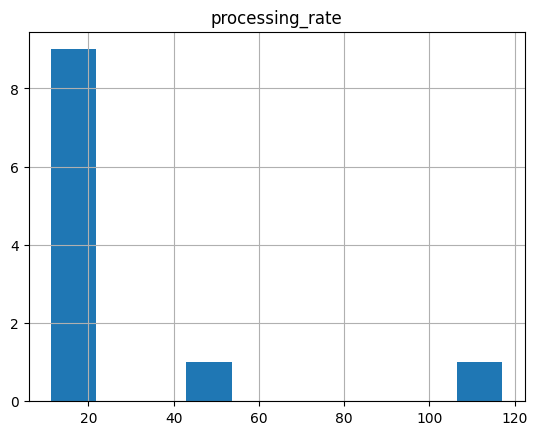

In [9]:
whisper.hist(column=['processing_rate'])

Well lets just take the average and then use it to calcuate an estimate:

In [10]:
avg_rate = whisper.processing_rate.mean()
avg_rate

25.38844648093287

In [12]:
175_766_400 / 25.38844648093287

6923086.063261231

That's 6,923,086 seconds to process the backlog which is:

In [13]:
6923086 / 60 / 60 / 24

80.12831018518519

So a best case estimate is 80 days.